(10분 지각 ppt로 수업하고 있었음 )

# 1 산업문제 소개 - 박윤영

# 주택 용도별 차이점과 기준

단독, 다가구, 다세대

하고싶은 것 

경기도 연면적 300 대지 250 건축연도 2010 도로조건 8 가격 6억원 이런 식으로 조건을 입력했을 떄 이것과 유사한 집들을 보여주는게 가능한지.

# 유사군 추출

어떻게 집들 사이에 유사도를 정의할지. 


# 2 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import os
import glob #파일 한꺼번에 부르기 위해서 사용
import re

In [2]:
glob.glob('*.*') #현재 작업하고 있는 파일명 모두

['environment-test.ipynb',
 'gh-data.zip',
 'nims-academy-190224-01 tutorial 1.ipynb',
 'nims-academy-190224-02 tutorial 2.ipynb',
 'nims-academy-190225-01 tutorial 3.ipynb',
 'nims-academy-190225-02 bayesian.ipynb',
 'nims-academy-190225-03-01 tutorial 4.ipynb',
 'nims-academy-190225-03-02 decision tree.ipynb',
 'nims-academy-190225-04 decision tree 2.ipynb',
 'nims-academy-190226-01 ensemble.ipynb',
 'nims-academy-190226-02 keras.ipynb',
 'nims-academy-190226-03 건설 데이터1-Copy1.ipynb',
 'nims-academy-190227-01-01.건설 데이터2.ipynb',
 'nims-academy-190227-01-02.건설 데이터3.02-01.건설 데이터4.ipynb',
 'nims-academy-190227-02-02 .ipynb',
 'nims-academy-190228-데이터.ipynb',
 'nims-academy-190228-연세대-오탁근-과제02-01.ipynb',
 'nims-academy-190228-연세대-오탁근-과제2-0.ipynb',
 '연수시설이용안내.jpg',
 '제4회 NIMS 산업수학 아카데미 개인 레포트.docx',
 '제4회 산업수학 아카데미 프로그램 안내.pdf']

In [3]:
glob.glob(os.path.join("gh-data","*.*"))

['gh-data\\2018_loc_for_add_in_seoul.xlsx',
 'gh-data\\2018_modified_data.xlsx',
 'gh-data\\2018_modified_data_my.xlsx',
 'gh-data\\2018_raw_data.xlsx',
 'gh-data\\2018_raw_data_my.xlsx',
 'gh-data\\201901_위치정보요약DB_전체분.zip',
 'gh-data\\entrc_seoul_head.txt',
 'gh-data\\entrc_seoul_head.xlsx',
 'gh-data\\map_seoul.html',
 'gh-data\\seoul_municipalities_geo_simple.json',
 'gh-data\\skorea_municipalities_geo_simple.json',
 'gh-data\\단독다가구(매매)_실거래가_ (1).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (10).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (11).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (12).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (2).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (3).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (4).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (5).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (6).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (7).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (8).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (9).xlsx',
 'gh-data\\지역_ID.txt']

In [4]:
filenames = glob.glob(os.path.join("gh-data","단독*.xlsx"))
filenames

['gh-data\\단독다가구(매매)_실거래가_ (1).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (10).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (11).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (12).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (2).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (3).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (4).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (5).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (6).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (7).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (8).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (9).xlsx']

In [5]:
re.split('([0-9]+)',filenames[1]) #숫자 연속된거까지 포함해서 숫자 있는 것에서 스플릿

['gh-data\\단독다가구(매매)_실거래가_ (', '10', ').xlsx']

In [6]:
filenames = sorted (filenames, key=lambda s: int(re.split('([0-9]+)',s)[1]),)
filenames

['gh-data\\단독다가구(매매)_실거래가_ (1).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (2).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (3).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (4).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (5).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (6).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (7).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (8).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (9).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (10).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (11).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (12).xlsx']

In [7]:
#잘 불러와지나 테스트

df0=pd.read_excel('gh-data/단독다가구(매매)_실거래가_ (1).xlsx',header = 16,encoding='utf-8').fillna(0) #header : 앞에 16줄 제외하려고. fillna(0)은 빈칸을 0으로 만들기 위해서

df0.head()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,강원도 강릉시 강동면 모전리,3**,단독,8m미만,64.20,205.0,201801,11~20,"10,520",2018.0,강동초교길
1,강원도 강릉시 견소동,2**,단독,12m미만,35.60,81.0,201801,1~10,"4,000",1990.0,창해로
2,강원도 강릉시 교동,9**,단독,12m미만,99.90,160.0,201801,11~20,"16,500",1982.0,원대로8번길
3,강원도 강릉시 교동,1***,단독,12m미만,326.88,211.6,201801,1~10,"64,300",2005.0,율곡초교길47번길
4,강원도 강릉시 교동,9**,단독,8m미만,154.99,240.2,201801,11~20,"19,000",1980.0,원대로20번길


In [8]:
len(df0)

7862

In [9]:
df0[['시군구','번지']]

,시군구,번지
0,강원도 강릉시 강동면 모전리,3**
1,강원도 강릉시 견소동,2**
2,강원도 강릉시 교동,9**
3,강원도 강릉시 교동,1***
4,강원도 강릉시 교동,9**
5,강원도 강릉시 구정면 구정리,*
6,강원도 강릉시 구정면 덕현리,3**
7,강원도 강릉시 구정면 덕현리,3**
8,강원도 강릉시 내곡동,1**
9,강원도 강릉시 내곡동,4*


In [10]:
df_raw=pd.DataFrame() #빈 데이터 프레임 만들기
for f in filenames:
    data = pd.read_excel(f,header=16,encoding='utf-8').fillna(0)
    df_raw = df_raw.append(data)

In [11]:
len(df_raw)

93156

In [12]:
df_raw.tail()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
4967,충청북도 충주시 용탄동,3**,단독,8m미만,84.50,228.0,201812,21~31,"5,700",1996.0,사래실길
4968,충청북도 충주시 중앙탑면 창동리,2**,단독,8m미만,42.34,383.0,201812,11~20,"3,800",1964.0,청금로
4969,충청북도 충주시 칠금동,7**,단독,12m미만,313.89,178.9,201812,1~10,"36,700",2004.0,칠금6길
4970,충청북도 충주시 호암동,1**,다가구,8m미만,368.28,285.0,201812,21~31,"65,000",2018.0,원호암3길
4971,충청북도 충주시 호암동,1**,단독,25m이상,40.67,492.0,201812,1~10,"20,500",1950.0,형설로


In [13]:
df_raw.reset_index(inplace=True,drop=True) #인덱스 정리
df_raw.tail()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
93151,충청북도 충주시 용탄동,3**,단독,8m미만,84.50,228.0,201812,21~31,"5,700",1996.0,사래실길
93152,충청북도 충주시 중앙탑면 창동리,2**,단독,8m미만,42.34,383.0,201812,11~20,"3,800",1964.0,청금로
93153,충청북도 충주시 칠금동,7**,단독,12m미만,313.89,178.9,201812,1~10,"36,700",2004.0,칠금6길
93154,충청북도 충주시 호암동,1**,다가구,8m미만,368.28,285.0,201812,21~31,"65,000",2018.0,원호암3길
93155,충청북도 충주시 호암동,1**,단독,25m이상,40.67,492.0,201812,1~10,"20,500",1950.0,형설로


In [14]:
df_raw.to_excel('gh-data/2018_raw_data_my.xlsx',index=None, encoding='utf-8') #파일 저장
glob.glob(os.path.join('gh-data','*.*'))

['gh-data\\2018_loc_for_add_in_seoul.xlsx',
 'gh-data\\2018_modified_data.xlsx',
 'gh-data\\2018_modified_data_my.xlsx',
 'gh-data\\2018_raw_data.xlsx',
 'gh-data\\2018_raw_data_my.xlsx',
 'gh-data\\201901_위치정보요약DB_전체분.zip',
 'gh-data\\entrc_seoul_head.txt',
 'gh-data\\entrc_seoul_head.xlsx',
 'gh-data\\map_seoul.html',
 'gh-data\\seoul_municipalities_geo_simple.json',
 'gh-data\\skorea_municipalities_geo_simple.json',
 'gh-data\\단독다가구(매매)_실거래가_ (1).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (10).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (11).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (12).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (2).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (3).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (4).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (5).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (6).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (7).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (8).xlsx',
 'gh-data\\단독다가구(매매)_실거래가_ (9).xlsx',
 'gh-data\\지역_ID.txt']

In [15]:
df_raw=pd.read_excel('gh-data/2018_raw_data.xlsx',index_col=None,header=0,encoding='utf-8') #파일 불러오기
df=df_raw.copy()
df.head()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,강원도 강릉시 강동면 모전리,3**,단독,8m미만,64.20,205.0,201801,11~20,"10,520",2018,강동초교길
1,강원도 강릉시 견소동,2**,단독,12m미만,35.60,81.0,201801,1~10,"4,000",1990,창해로
2,강원도 강릉시 교동,9**,단독,12m미만,99.90,160.0,201801,11~20,"16,500",1982,원대로8번길
3,강원도 강릉시 교동,1***,단독,12m미만,326.88,211.6,201801,1~10,"64,300",2005,율곡초교길47번길
4,강원도 강릉시 교동,9**,단독,8m미만,154.99,240.2,201801,11~20,"19,000",1980,원대로20번길


In [16]:
df.describe() #내용중 숫자로 된 데이터의 성질을 말해준다. 거래금액, 계약일이 안나오는 이유는 str으로 저장되어있어서 일 수 있음

,연면적(㎡),대지면적(㎡),계약년월,건축년도
count,93156.000000,93156.000000,93156.000000,93156.000000
mean,160.954894,269.242972,201806.166763,1986.259608
std,153.372718,535.536227,3.306179,54.643186
min,4.860000,3.880000,201801.000000,0.000000
25%,69.410000,123.800000,201803.000000,1978.000000
50%,112.200000,186.100000,201806.000000,1989.000000
75%,191.900000,323.600000,201809.000000,2001.000000
max,5225.220000,119119.000000,201812.000000,2019.000000


In [17]:
df.dtypes #각각 column의 값들의 타잎 #연면적 : 층별로 다 바닥면적 합친 것/ 대지면적 : 토지면적을 수평에 정사영한 면적/ 토지면적 : 실제 땅의 면적 = 잔디 깔때 필요한 면적

시군구          object
번지           object
주택유형         object
도로조건         object
연면적(㎡)      float64
대지면적(㎡)     float64
계약년월          int64
계약일          object
거래금액(만원)     object
건축년도          int64
도로명          object
dtype: object

In [18]:
df['거래금액(만원)']=df['거래금액(만원)'].str.replace(',','').astype(float) #,를 공배으로 바꾸고 float으로 형태 바꾸기
df.head(10)

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,강원도 강릉시 강동면 모전리,3**,단독,8m미만,64.20,205.0,201801,11~20,10520.0,2018,강동초교길
1,강원도 강릉시 견소동,2**,단독,12m미만,35.60,81.0,201801,1~10,4000.0,1990,창해로
2,강원도 강릉시 교동,9**,단독,12m미만,99.90,160.0,201801,11~20,16500.0,1982,원대로8번길
3,강원도 강릉시 교동,1***,단독,12m미만,326.88,211.6,201801,1~10,64300.0,2005,율곡초교길47번길
4,강원도 강릉시 교동,9**,단독,8m미만,154.99,240.2,201801,11~20,19000.0,1980,원대로20번길
5,강원도 강릉시 구정면 구정리,*,단독,8m미만,106.26,530.0,201801,21~31,21000.0,2017,청파로
6,강원도 강릉시 구정면 덕현리,3**,단독,8m미만,69.03,407.0,201801,1~10,6450.0,1990,누일길
7,강원도 강릉시 구정면 덕현리,3**,단독,8m미만,61.60,426.0,201801,1~10,6700.0,1990,누일길
8,강원도 강릉시 내곡동,1**,단독,8m미만,79.68,194.0,201801,21~31,20500.0,2015,남산초교길12번길
9,강원도 강릉시 내곡동,4*,단독,25m미만,36.30,214.0,201801,21~31,15850.0,1971,강변로


In [19]:
df['도로조건'].unique() #데이터 어떤 것들 들어가있는지

array(['8m미만', '12m미만', '25m미만', '-', '25m이상'], dtype=object)

In [20]:
df['도로조건']=df['도로조건'].replace(['-','m미만','25m이상'],['0','','26'],regex=True).astype(float)
df['도로조건'].unique()

array([ 8., 12., 25.,  0., 26.])

In [21]:
s=df['계약년월'].astype(str)
df['연도']=s.str[0:4].astype(int) #없는 칼럼도 이렇게 바로 만들 수 있음
df['월']=s.str[-2:].astype(int)
# del df['계약년월']
df.head() #여기에 오류나 있는 이유는 한번 돌아간게 다시 돌리는 바람에 '계약년월'칼럼이 없기 때문에

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명,연도,월
0,강원도 강릉시 강동면 모전리,3**,단독,8.0,64.20,205.0,201801,11~20,10520.0,2018,강동초교길,2018,1
1,강원도 강릉시 견소동,2**,단독,12.0,35.60,81.0,201801,1~10,4000.0,1990,창해로,2018,1
2,강원도 강릉시 교동,9**,단독,12.0,99.90,160.0,201801,11~20,16500.0,1982,원대로8번길,2018,1
3,강원도 강릉시 교동,1***,단독,12.0,326.88,211.6,201801,1~10,64300.0,2005,율곡초교길47번길,2018,1
4,강원도 강릉시 교동,9**,단독,8.0,154.99,240.2,201801,11~20,19000.0,1980,원대로20번길,2018,1


In [22]:
del df['번지']
del df['계약일']
# del df['도로명']

In [23]:
df.head()

,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,거래금액(만원),건축년도,도로명,연도,월
0,강원도 강릉시 강동면 모전리,단독,8.0,64.20,205.0,201801,10520.0,2018,강동초교길,2018,1
1,강원도 강릉시 견소동,단독,12.0,35.60,81.0,201801,4000.0,1990,창해로,2018,1
2,강원도 강릉시 교동,단독,12.0,99.90,160.0,201801,16500.0,1982,원대로8번길,2018,1
3,강원도 강릉시 교동,단독,12.0,326.88,211.6,201801,64300.0,2005,율곡초교길47번길,2018,1
4,강원도 강릉시 교동,단독,8.0,154.99,240.2,201801,19000.0,1980,원대로20번길,2018,1


지도 정보 데이터 파일은 오픈소스. 서울지역, 전국지역 각각 있다. 

In [24]:
#지도 데이터 파일과 형식 맞춰주기 위한 과정 : 지역_ID.txt

SiDo = []
SiGunGu = []
DongLi = []

for i in range(0,len(df['시군구'])):
    tmp = df['시군구'][i].split()  # 띄어쓰기로 split
    SiDo.append(tmp[0])            # 시/도
    SiGunGu.append(tmp[1])         # 시/군/구
    if len(tmp) > 3:
        DongLi.append(tmp[-1]+'('+tmp[2]+')')
    else:
        DongLi.append(tmp[-1])

In [25]:
df['SiDo'] = SiDo 
df['SiGunGu'] = SiGunGu
df['DongLi'] = DongLi

def cut_char_sigu(name):
    return name if len(name)==2 else name[:-1]

In [26]:
sido_candi =  df['SiDo'] #파일에서 특별시에는 '관악' 이런식이 아니라 '서울 관악' 이렇게 되어있기 떄문에 맞춰주려는 것
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산','세종'] else '' for name in sido_candi]

sigun_candi = ['']*len(df)
for n in df.index:
#     print(n)
    each = df['SiGunGu'][n]
    if each[:2] in ['수원', '성남','안양','안산','고양','용인','청주','천안','전주','포항','창원']: #여기도 '분당' 아니라 '성남 분당' 이렇게 되어있는 곳들
        sigun_candi[n] = each[:2] + ' ' + each[2:-1] #re.split('시', each)[0]+' '+ cut_char_sigu(re.split('시', each)[1])
    else:
        sigun_candi[n] = cut_char_sigu(each)
        
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0,len(sigun_candi))]
ID_candi = [name[1:] if name[0]==' ' else name for name in ID_candi]
ID_candi = [name[:2] if name[:2]=='세종' else name for name in ID_candi]
df['ID'] = ID_candi

In [27]:
df.head() #박사님이 빠트린 부분 있다고 내일 다른 박사님이 얘기해줄거라고 함

,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,거래금액(만원),건축년도,도로명,연도,월,SiDo,SiGunGu,DongLi,ID
0,강원도 강릉시 강동면 모전리,단독,8.0,64.20,205.0,201801,10520.0,2018,강동초교길,2018,1,강원도,강릉시,모전리(강동면),강릉
1,강원도 강릉시 견소동,단독,12.0,35.60,81.0,201801,4000.0,1990,창해로,2018,1,강원도,강릉시,견소동,강릉
2,강원도 강릉시 교동,단독,12.0,99.90,160.0,201801,16500.0,1982,원대로8번길,2018,1,강원도,강릉시,교동,강릉
3,강원도 강릉시 교동,단독,12.0,326.88,211.6,201801,64300.0,2005,율곡초교길47번길,2018,1,강원도,강릉시,교동,강릉
4,강원도 강릉시 교동,단독,8.0,154.99,240.2,201801,19000.0,1980,원대로20번길,2018,1,강원도,강릉시,교동,강릉


In [28]:
df.to_excel('gh-data/2018_modified_data_my.xlsx',index=None,encoding='utf-8')

In [29]:
house_data=pd.read_excel('gh-data/2018_modified_data.xlsx', index_col=None, header=0,encoding='utf-8')
house_data.head()

,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
0,강원도 강릉시 강동면 모전리,단독,8,64.20,205.0,10520,2018,2018,1,강원도,강릉시,모전리(강동면),강릉
1,강원도 강릉시 견소동,단독,12,35.60,81.0,4000,1990,2018,1,강원도,강릉시,견소동,강릉
2,강원도 강릉시 교동,단독,12,99.90,160.0,16500,1982,2018,1,강원도,강릉시,교동,강릉
3,강원도 강릉시 교동,단독,12,326.88,211.6,64300,2005,2018,1,강원도,강릉시,교동,강릉
4,강원도 강릉시 교동,단독,8,154.99,240.2,19000,1980,2018,1,강원도,강릉시,교동,강릉


zillow.com 이라는 해외 사이트가 있는데. 사는건지 렌탈인건지 금액 방개수 설정해서 집 타입 화장실 개수 등등 조건 넣어서 조건에 해당되는 집 추천해주고 있다.

정보가 꽤나 다양히 있다. 네이버 부동산에는 꽤나 정보가 다양하게 있긴 함. 직방은 한 세대 단위로만 매매하기 떄문에 건물 매매는 안나와있다. 건물안에 있었던 매매 정보라든지 학교정보 쭉 나와있다.

서울 열린 데이터 광장, 등등 추천. 조금 쉬었다가 끝내겠따.

# Data cleaning and Visualization

In [30]:
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
del house_data['시군구']

In [32]:
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

In [33]:
house_type=house_data['주택유형'].unique()

In [34]:
num1=house_data['주택유형'][house_data['주택유형']=='단독'].count()

In [35]:
num2=house_data['주택유형'][house_data['주택유형']=='다가구'].count()

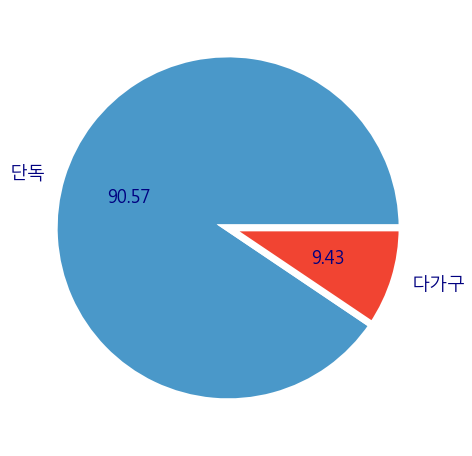

In [36]:
fig_pie=plt.figure(figsize=(8,8))
num_type=[num1,num2]
plt.rcParams['text.color']='Navy'
a, b=[plt.cm.Blues, plt.cm.Reds] 
plt.pie(num_type, labels=house_type, #그림은 여기줄만 해도 된다고 함
        colors=[a(0.6),b(0.6)],
        autopct='%.2f',  #자동으로 퍼센트 계산해서 해주라는 것
        wedgeprops={'linewidth':7,'edgecolor':'white'},
        textprops={'fontsize':18})
plt.show()